<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [5]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis


Primero, leamos el conjunto de datos de SpaceX en un marco de datos de Pandas e imprimamos su resumen


In [7]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


Primero, intentemos ver cómo las variables `FlightNumber` (que indica los intentos de lanzamiento continuos) y `Payload` afectarían el resultado del lanzamiento.

Podemos representar gráficamente el <code>FlightNumber</code> frente a la <code>PayloadMass</code> y superponer el resultado del lanzamiento. Vemos que a medida que aumenta el número de vuelo, es más probable que la primera etapa aterrice con éxito. La masa de la carga útil también parece ser un factor; incluso con cargas útiles más pesadas, la primera etapa suele regresar con éxito.

C:\Users\efarias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


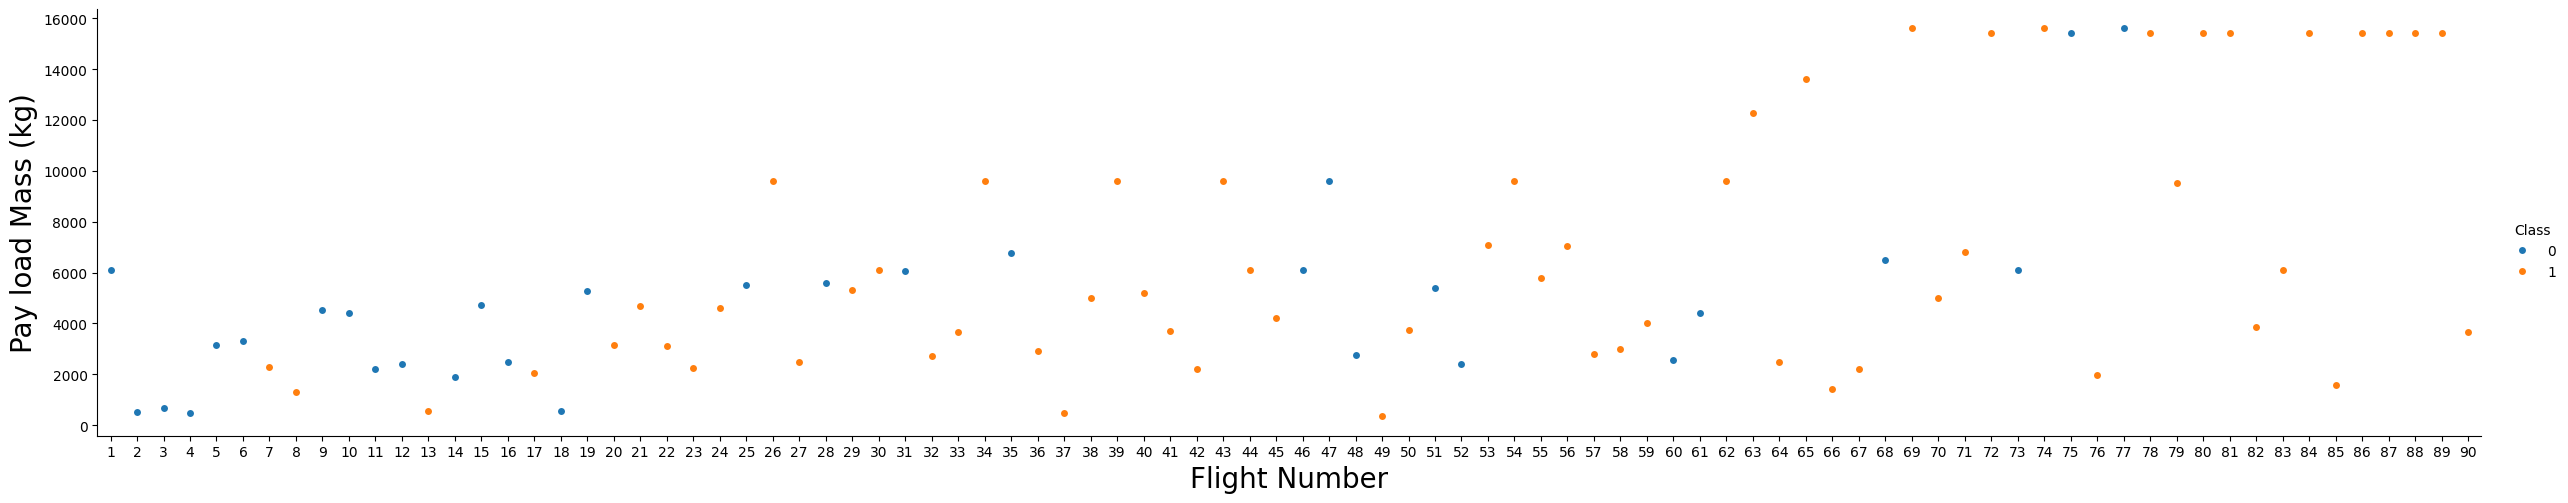

In [8]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

A continuación, analicemos en profundidad cada sitio para visualizar sus registros de lanzamiento detallados.


### TAREA 1: Visualizar la relación entre el número de vuelo y el lugar de lanzamiento


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


C:\Users\efarias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


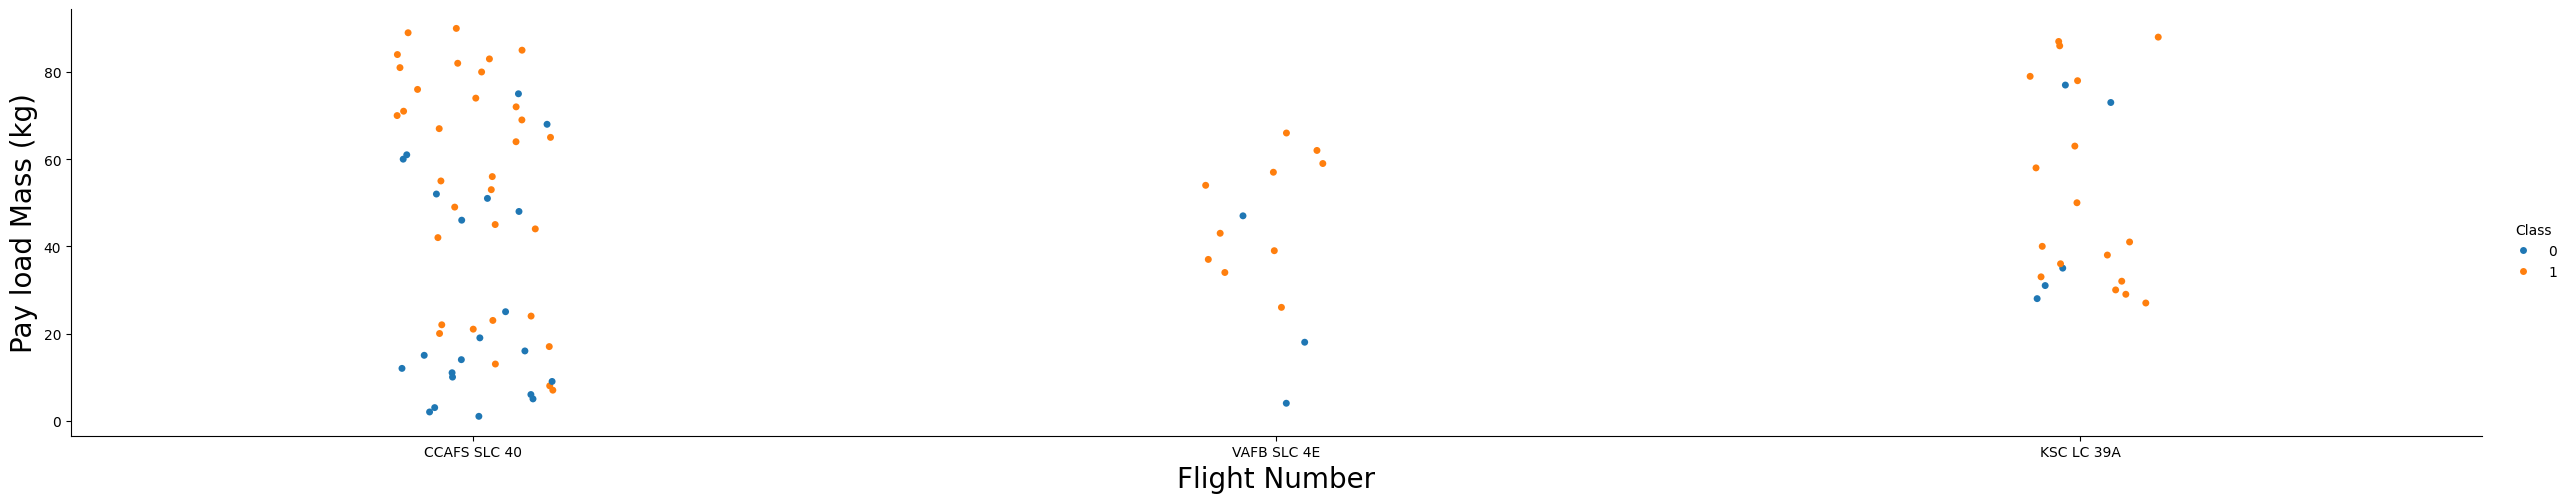

In [9]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="FlightNumber",x="LaunchSite",hue='Class',data=df, aspect=5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Ahora intenta explicar los patrones que encontraste en los gráficos de puntos de dispersión del número de vuelo frente al sitio de lanzamiento.


### TAREA 2: Visualizar la relación entre la masa de la carga útil y el sitio de lanzamiento


También queremos observar si existe alguna relación entre los sitios de lanzamiento y la masa de su carga útil.


C:\Users\efarias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


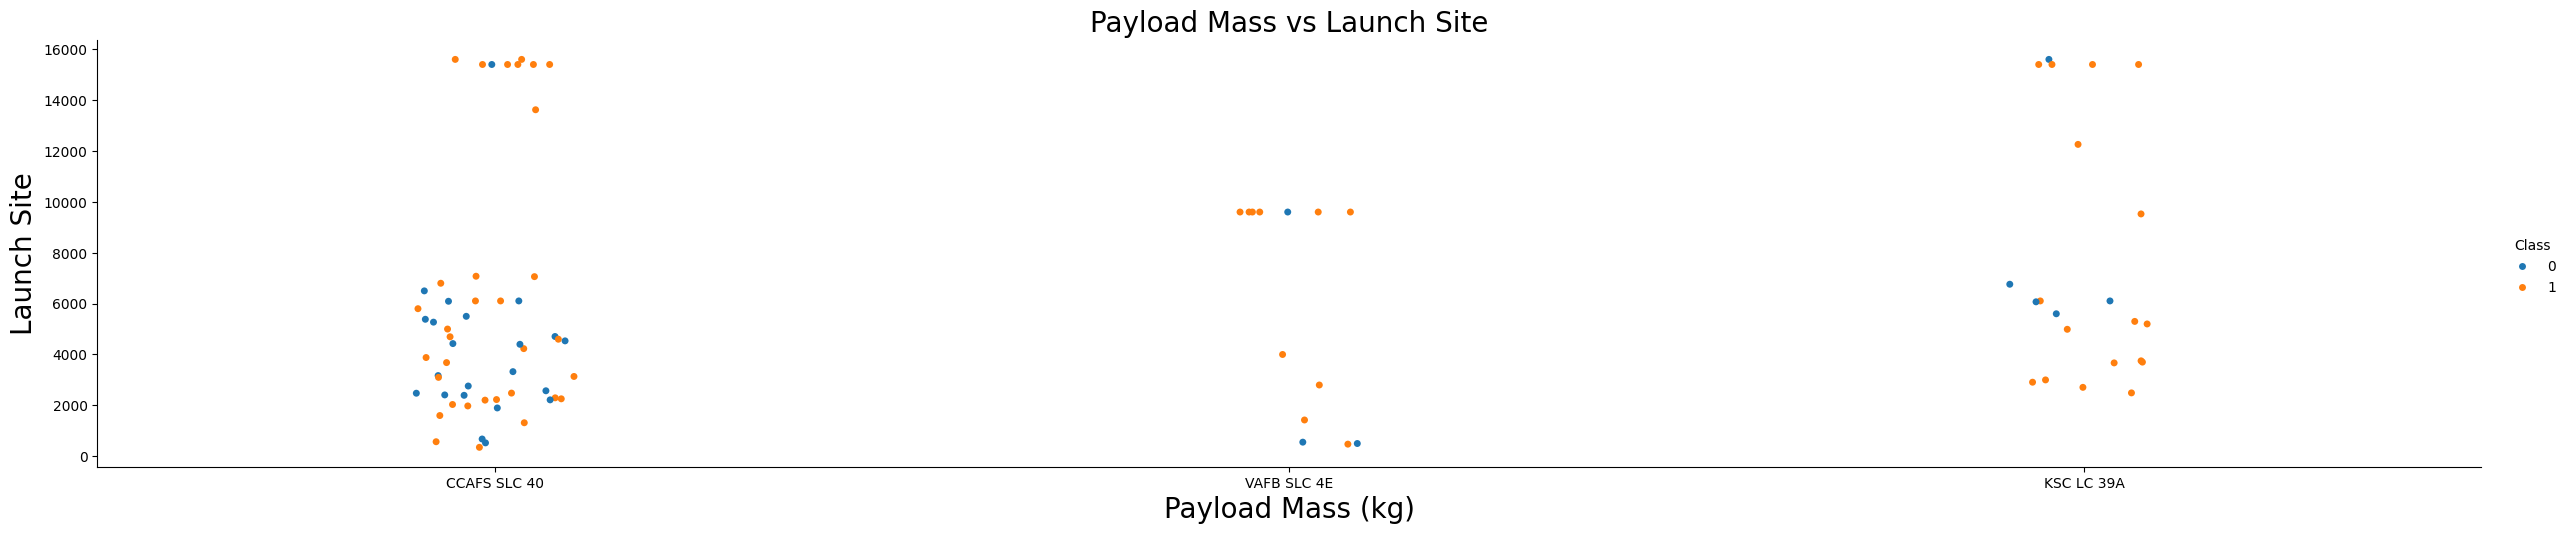

In [10]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="PayloadMass", x="LaunchSite", hue="Class", data=df, aspect = 5)
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.title("Payload Mass vs Launch Site", fontsize=20)
plt.show()

Ahora, si observa el gráfico de puntos de dispersión de masa de carga útil versus lugar de lanzamiento, encontrará que para el sitio de lanzamiento VAFB-SLC no hay cohetes lanzados para una masa de carga útil pesada (superior a 10 000).


### TAREA 3: Visualizar la relación entre la tasa de éxito de cada tipo de órbita



A continuación, queremos comprobar visualmente si existe alguna relación entre la tasa de éxito y el tipo de órbita.


Creemos un "gráfico de barras" para la tasa de éxito de cada órbita.


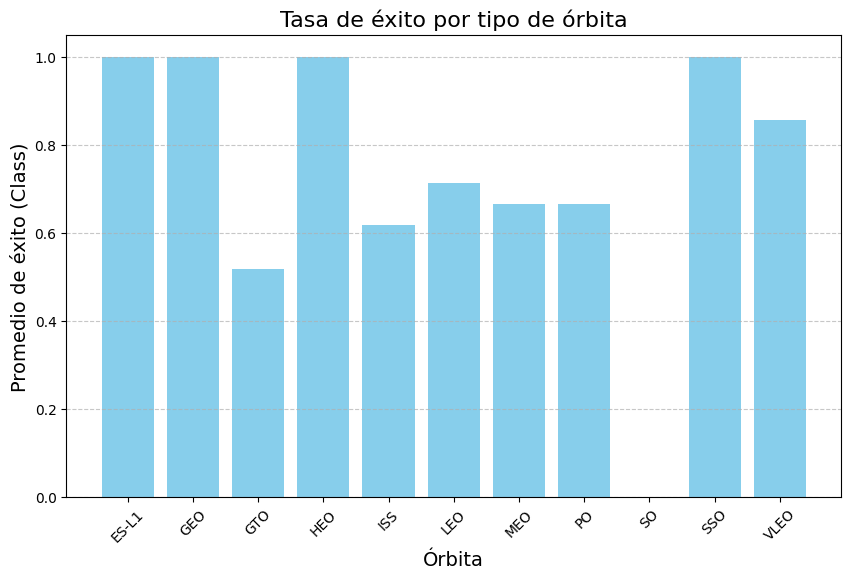

In [13]:
# HINT use groupby method on Orbit column and get the mean of Class column
# Crear el gráfico de barras
orbit_mean_class = df.groupby('Orbit')['Class'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(orbit_mean_class['Orbit'], orbit_mean_class['Class'], color='skyblue')

# Personalizar el gráfico
plt.title("Tasa de éxito por tipo de órbita", fontsize=16)
plt.xlabel("Órbita", fontsize=14)
plt.ylabel("Promedio de éxito (Class)", fontsize=14)
plt.xticks(rotation=45)  # Rotar etiquetas del eje X si es necesario
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Líneas de cuadrícula

# Mostrar el gráfico
plt.show()



Analice el gráfico de barras trazado para identificar qué órbitas tienen las tasas de éxito más altas.


### TAREA 4: Visualizar la relación entre FlightNumber y el tipo de órbita


Para cada órbita, queremos ver si existe alguna relación entre el número de vuelo y el tipo de órbita.

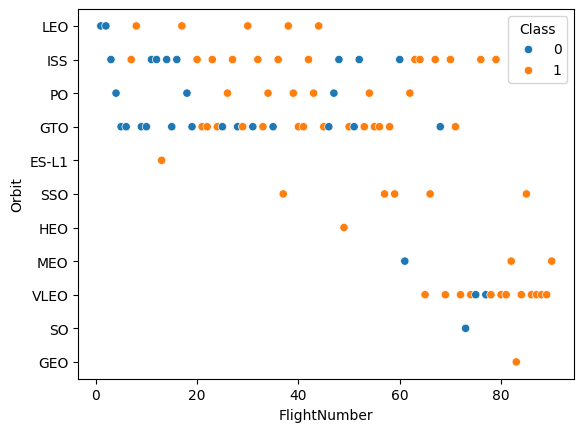

In [ ]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
# Crear el gráfico de dispersión

sns.scatterplot(
    x="FlightNumber", 
    y="Orbit", 
    hue="Class", 
    data=df, 
)
plt.show()


Se puede observar que en la órbita LEO, el éxito parece estar relacionado con el número de vuelos. Por el contrario, en la órbita GTO, no parece haber relación entre el número de vuelos y el éxito.


### TAREA 5: Visualizar la relación entre la masa de la carga útil y el tipo de órbita


Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type


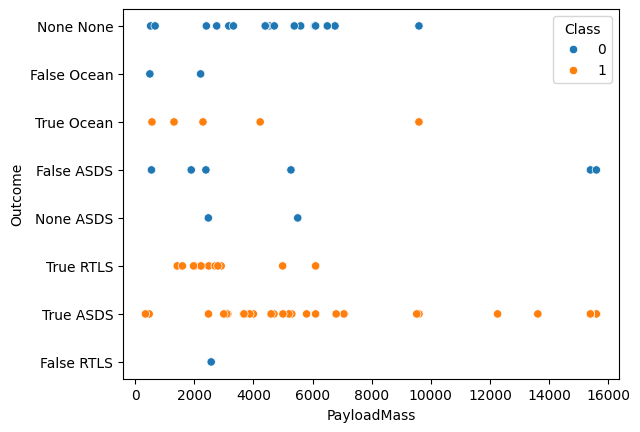

In [22]:
# Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value

sns.scatterplot(
    x="PayloadMass", 
    y="Outcome", 
    hue="Class", 
    data=df, 
)

plt.show()


Con cargas útiles pesadas, la tasa de aterrizajes exitosos o de aterrizajes positivos es mayor en el caso de la órbita polar, la órbita baja y la Estación Espacial Internacional.

Sin embargo, en el caso de la Tierra Media, es difícil distinguir entre aterrizajes exitosos y fallidos, ya que ambos resultados están presentes.


### TAREA 6: Visualizar la tendencia anual de éxito del lanzamiento


Puede trazar un gráfico de líneas con el eje x como Año y el eje y como tasa de éxito promedio, para obtener la tendencia de éxito de lanzamiento promedio.


The function will help you get the year from the date:


In [32]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


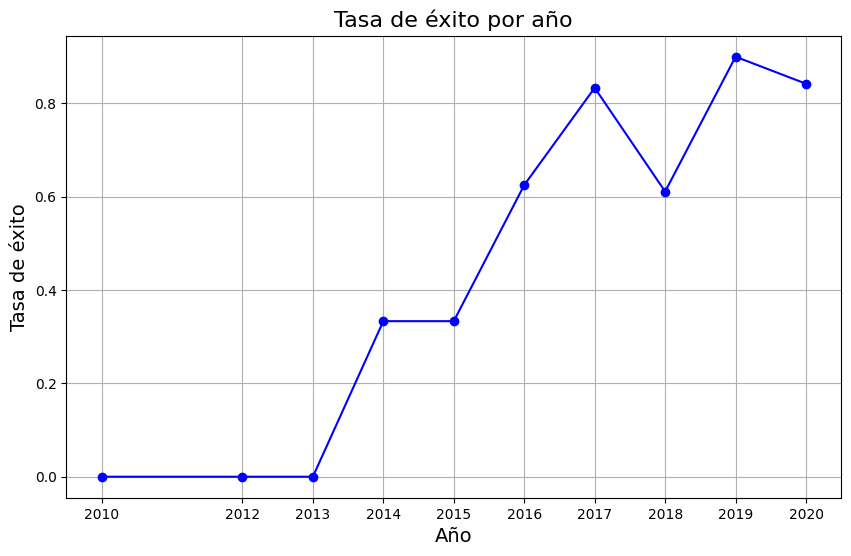

In [36]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate

df['Year'] = pd.to_datetime(df['Date']).dt.year

# Calcular la tasa de éxito (promedio de 'Class') agrupando por 'Year'
success_rate_by_year = df.groupby('Year')['Class'].mean().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(success_rate_by_year['Year'], success_rate_by_year['Class'], marker='o', linestyle='-', color='b')

# Personalización del gráfico
plt.title("Tasa de éxito por año", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Tasa de éxito", fontsize=14)
plt.grid(True)  # Mostrar cuadrícula
plt.xticks(success_rate_by_year['Year'])  # Asegurar que los años aparezcan correctamente en el eje X

# Mostrar el gráfico
plt.show()

Se puede observar que la tasa de éxito desde 2013 siguió aumentando hasta 2020.


## Features Engineering


A esta altura, ya debería tener algunas ideas preliminares sobre cómo cada variable importante afectaría la tasa de éxito; seleccionaremos las características que se utilizarán en la predicción del éxito en el módulo futuro.


In [37]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TAREA 7: Crear variables ficticias para columnas categóricas


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [41]:
# HINT: Use get_dummies() function on the categorical columns
# Aplicar get_dummies a las columnas especificadas para codificación One-Hot
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

features_one_hot 

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,15400.000000,2,True,True,True,5.0,2,False,False,...,False,False,False,False,False,False,False,False,True,False
86,87,15400.000000,3,True,True,True,5.0,2,False,False,...,False,False,False,False,False,False,True,False,False,False
87,88,15400.000000,6,True,True,True,5.0,5,False,False,...,False,False,False,True,False,False,False,False,False,False
88,89,15400.000000,3,True,True,True,5.0,2,False,False,...,False,False,False,False,False,False,False,False,True,False


### TASK  8: Cast all numeric columns to `float64`


Ahora que nuestro marco de datos <code>features_one_hot</code> solo contiene números, convierta todo el marco de datos al tipo de variable <code>float64</code>


In [ ]:
# HINT: use astype function

We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log-->


<!--
| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|
| 2024-07-18        | 1.2     | Anita Verma | Clarified instructions|
-->


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
